In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timezone

In [3]:
import seaborn as sns

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
from dtaidistance import dtw

In [ ]:
from sklearn.preprocessing import minmax_scale, StandardScaler

In [5]:
All=pd.read_csv('C:/Users/todtj/OneDrive/바탕 화면/졸업논문/All_189.csv')

In [7]:
All[10:]

,Time,Bitcoin,Bitcoin_sv,Bitcoin_cash,Xrp,Ethereum,Litecoin,Dowjones,S_p,Nasdac,Dollar,Gold
10,2020-01-16,8726.9,313.77,327.01,0.22918,164.36,57.632,29297.64,3316.81,9357.13,97.062,1554.6
11,2020-01-17,8913.1,287.47,368.00,0.23917,170.22,61.064,29348.10,3329.62,9388.94,97.359,1557.6
12,2020-01-21,8732.6,315.38,343.54,0.23722,169.41,57.597,29196.04,3320.79,9370.81,97.294,1551.3
13,2020-01-22,8678.5,308.28,349.08,0.23720,168.13,58.309,29186.27,3321.75,9383.77,97.295,1556.9
14,2020-01-23,8405.1,258.80,325.15,0.22595,162.80,54.484,29160.09,3325.54,9402.48,97.484,1562.9
...,...,...,...,...,...,...,...,...,...,...,...,...
184,2020-09-24,10739.4,156.69,216.20,0.23273,349.17,44.947,26815.44,3246.59,10672.27,94.394,1861.8
185,2020-09-25,10688.8,155.62,216.47,0.24155,351.63,46.025,27173.96,3298.46,10913.56,94.682,1859.7
186,2020-09-28,10693.2,167.78,225.78,0.24099,354.08,45.246,27584.06,3351.60,11117.53,94.302,1864.3
187,2020-09-29,10840.9,171.79,229.02,0.24274,359.86,45.697,27452.66,3335.47,11085.25,93.927,1883.9


In [17]:
All['Time']=All['Time'].astype('datetime64[ns]')

In [23]:
All.set_index('Time',inplace=True)

In [24]:
All

,Bitcoin,Bitcoin_sv,Bitcoin_cash,Xrp,Ethereum,Litecoin,Dowjones,S_p,Nasdac,Dollar,Gold
Time,,,,,,,,,,,
2020-01-02,6967.0,92.93,195.48,0.18748,127.19,39.556,28868.80,3257.85,9092.19,96.525,1527.1
2020-01-03,7343.1,102.57,222.23,0.19321,134.27,42.178,28634.88,3234.85,9020.77,96.521,1548.8
2020-01-06,7759.1,117.77,244.16,0.22306,144.08,45.778,28703.38,3246.28,9071.47,96.350,1573.1
2020-01-07,8155.7,113.85,242.67,0.21351,143.04,46.400,28583.68,3237.18,9068.58,96.702,1567.9
2020-01-08,8059.6,114.17,240.05,0.20756,140.81,45.374,28745.09,3253.05,9129.24,96.996,1572.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-24,10739.4,156.69,216.20,0.23273,349.17,44.947,26815.44,3246.59,10672.27,94.394,1861.8
2020-09-25,10688.8,155.62,216.47,0.24155,351.63,46.025,27173.96,3298.46,10913.56,94.682,1859.7
2020-09-28,10693.2,167.78,225.78,0.24099,354.08,45.246,27584.06,3351.60,11117.53,94.302,1864.3


# DTW

# 비트코인과 다우존스, S&P ,  Nasdac , Dollar , Gold 와의 DTW값.

## All = 전체기간 ,30 = 9월30일 기준 최근 0~30일전 , 60 = 30~60일 전 , 90 = 60~ 90 일 전

# ALL

In [314]:
five=All[['Bitcoin','Dowjones','S_p','Nasdac','Dollar','Gold']]

In [315]:
DTW1=[]
All_minmax=five.apply(minmax_scale)
for i in range(len(All_minmax.columns)):
    distance=dtw.distance(All_minmax[All_minmax.columns[0]],All_minmax[All_minmax.columns[i]])
    DTW1.append(distance)
    print(All_minmax.columns[i],distance)
    

Bitcoin 0.0
Dowjones 2.4303675938721283
S_p 1.4528130074068637
Nasdac 0.7877053558873913
Dollar 4.899482255287641
Gold 1.7089550421911077


# 30

In [316]:
DTW2=[]
All_minmax=five[159:].apply(minmax_scale)
for i in range(len(All_minmax.columns)):
    distance=dtw.distance(All_minmax[All_minmax.columns[0]],All_minmax[All_minmax.columns[i]])
    DTW2.append(distance)
    print(All_minmax.columns[i],distance)

Bitcoin 0.0
Dowjones 1.0716343981596301
S_p 1.057285036077269
Nasdac 1.0256916764465451
Dollar 1.9389203391014385
Gold 0.9248568347391557


# 60

In [317]:
DTW3=[]
All_minmax=five[129:159].apply(minmax_scale)
for i in range(len(All_minmax.columns)):
    distance=dtw.distance(All_minmax[All_minmax.columns[0]],All_minmax[All_minmax.columns[i]])
    DTW3.append(distance)
    print(All_minmax.columns[i],distance)

Bitcoin 0.0
Dowjones 0.736668850538666
S_p 0.6963738655771452
Nasdac 0.6850401044010488
Dollar 3.435510660010672
Gold 0.6027639226724498


# 90

In [318]:
DTW4=[]
All_minmax=five[99:129].apply(minmax_scale)
for i in range(len(All_minmax.columns)):
    distance=dtw.distance(All_minmax[All_minmax.columns[0]],All_minmax[All_minmax.columns[i]])
    DTW4.append(distance)
    print(All_minmax.columns[i],distance)

Bitcoin 0.0
Dowjones 0.6922816583619474
S_p 0.919932524475128
Nasdac 1.2992232739829959
Dollar 1.421713257807424
Gold 1.7754837376629082


# 코사인 유사도

In [319]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

# All

In [320]:
Cos1=[]
All_minmax=five.apply(minmax_scale)
for i in range(len(All_minmax.columns)):
    cos=cos_sim(All_minmax[All_minmax.columns[0]],All_minmax[All_minmax.columns[i]])
    Cos1.append(cos)
    print(All_minmax.columns[i],cos)

Bitcoin 1.0000000000000002
Dowjones 0.9665253611948552
S_p 0.9812255396534643
Nasdac 0.9849321175570663
Dollar 0.7075612004152826
Gold 0.9455522370838816


# 30

In [321]:
Cos2=[]
All_minmax=five[159:].apply(minmax_scale)
for i in range(len(All_minmax.columns)):
    cos=cos_sim(All_minmax[All_minmax.columns[0]],All_minmax[All_minmax.columns[i]])
    Cos2.append(cos)
    print(All_minmax.columns[i],cos)

Bitcoin 1.0
Dowjones 0.8844578376815948
S_p 0.8895962131547817
Nasdac 0.8987975352663091
Dollar 0.5902487331348879
Gold 0.8345627574857606


# 60

In [322]:
Cos3=[]
All_minmax=five[129:159].apply(minmax_scale)
for i in range(len(All_minmax.columns)):
    cos=cos_sim(All_minmax[All_minmax.columns[0]],All_minmax[All_minmax.columns[i]])
    Cos3.append(cos)
    print(All_minmax.columns[i],cos)

Bitcoin 1.0
Dowjones 0.8954634788086792
S_p 0.9449555632896176
Nasdac 0.9216229461431865
Dollar 0.3328326086584568
Gold 0.9708906339664819


# 90

In [323]:
Cos4=[]
All_minmax=five[99:129].apply(minmax_scale)
for i in range(len(All_minmax.columns)):
    cos=cos_sim(All_minmax[All_minmax.columns[0]],All_minmax[All_minmax.columns[i]])
    Cos4.append(cos)
    print(All_minmax.columns[i],cos)

Bitcoin 1.0
Dowjones 0.8890415338647042
S_p 0.8829695381575368
Nasdac 0.7800342596813534
Dollar 0.7280546235681724
Gold 0.7133201825185432


# 유클리드

In [324]:
np.linalg.norm([1,2,3])

3.7416573867739413

# all

In [325]:
Euc1=[]
All_minmax=five.apply(minmax_scale)
for i in range(len(All_minmax.columns)):
    euc=sum(abs(All_minmax[All_minmax.columns[0]]-All_minmax[All_minmax.columns[i]]))
    Euc1.append(euc)
    print(All_minmax.columns[i],euc)

Bitcoin 0.0
Dowjones 27.890309339841174
S_p 19.902157558655002
Nasdac 18.406314276522075
Dollar 64.67349430289474
Gold 31.99134750892471


# 30

In [326]:
Euc2=[]
All_minmax=five[159:].apply(minmax_scale)
for i in range(len(All_minmax.columns)):
    euc=sum(abs(All_minmax[All_minmax.columns[0]]-All_minmax[All_minmax.columns[i]]))
    Euc2.append(euc)
    print(All_minmax.columns[i],euc)

Bitcoin 0.0
Dowjones 5.9520450621283105
S_p 5.658347004964411
Nasdac 5.22298645949056
Dollar 12.449251455283324
Gold 8.519405423603931


# 60

In [327]:
Euc3=[]
All_minmax=five[129:159].apply(minmax_scale)
for i in range(len(All_minmax.columns)):
    euc=sum(abs(All_minmax[All_minmax.columns[0]]-All_minmax[All_minmax.columns[i]]))
    Euc3.append(euc)
    print(All_minmax.columns[i],euc)

Bitcoin 0.0
Dowjones 6.787676664317377
S_p 4.596065727899704
Nasdac 5.118835174227248
Dollar 18.67185549150082
Gold 3.1118205543664774


# 90

In [328]:
Euc4=[]
All_minmax=five[99:129].apply(minmax_scale)
for i in range(len(All_minmax.columns)):
    euc=sum(abs(All_minmax[All_minmax.columns[0]]-All_minmax[All_minmax.columns[i]]))
    Euc4.append(euc)
    print(All_minmax.columns[i],euc)

Bitcoin 0.0
Dowjones 4.703424524984054
S_p 5.645359403068656
Nasdac 8.137937640672149
Dollar 8.247648747648752
Gold 10.372271397247827


In [329]:
result=pd.DataFrame([Euc1,Euc2,Euc3,Euc4,DTW1,DTW2,DTW3,DTW4,Cos1,Cos2,Cos3,Cos4]).T

In [330]:
result

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
1,27.890309,5.952045,6.787677,4.703425,2.430368,1.071634,0.736669,0.692282,0.966525,0.884458,0.895463,0.889042
2,19.902158,5.658347,4.596066,5.645359,1.452813,1.057285,0.696374,0.919933,0.981226,0.889596,0.944956,0.882970
3,18.406314,5.222986,5.118835,8.137938,0.787705,1.025692,0.685040,1.299223,0.984932,0.898798,0.921623,0.780034
4,64.673494,12.449251,18.671855,8.247649,4.899482,1.938920,3.435511,1.421713,0.707561,0.590249,0.332833,0.728055
5,31.991348,8.519405,3.111821,10.372271,1.708955,0.924857,0.602764,1.775484,0.945552,0.834563,0.970891,0.713320


In [331]:
result.index=['Bitcoin','Dowjones','S_p','Nasdac','Dollar','Gold']

In [332]:
result.columns=['Euc','Euc30','Euc60','Euc90','Dtw','Dtw30','Dtw60','Dtw90','Cos','Cos30','Cos60','Cos90']

# 최종 결과표

In [333]:
result

,Euc,Euc30,Euc60,Euc90,Dtw,Dtw30,Dtw60,Dtw90,Cos,Cos30,Cos60,Cos90
Bitcoin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
Dowjones,27.890309,5.952045,6.787677,4.703425,2.430368,1.071634,0.736669,0.692282,0.966525,0.884458,0.895463,0.889042
S_p,19.902158,5.658347,4.596066,5.645359,1.452813,1.057285,0.696374,0.919933,0.981226,0.889596,0.944956,0.882970
Nasdac,18.406314,5.222986,5.118835,8.137938,0.787705,1.025692,0.685040,1.299223,0.984932,0.898798,0.921623,0.780034
Dollar,64.673494,12.449251,18.671855,8.247649,4.899482,1.938920,3.435511,1.421713,0.707561,0.590249,0.332833,0.728055
Gold,31.991348,8.519405,3.111821,10.372271,1.708955,0.924857,0.602764,1.775484,0.945552,0.834563,0.970891,0.713320


In [346]:
result.drop('Bitcoin',inplace=True)

In [352]:
result

,Euc,Euc30,Euc60,Euc90,Dtw,Dtw30,Dtw60,Dtw90,Cos,Cos30,Cos60,Cos90
Dowjones,27.890309,5.952045,6.787677,4.703425,2.430368,1.071634,0.736669,0.692282,0.966525,0.884458,0.895463,0.889042
S_p,19.902158,5.658347,4.596066,5.645359,1.452813,1.057285,0.696374,0.919933,0.981226,0.889596,0.944956,0.882970
Nasdac,18.406314,5.222986,5.118835,8.137938,0.787705,1.025692,0.685040,1.299223,0.984932,0.898798,0.921623,0.780034
Dollar,64.673494,12.449251,18.671855,8.247649,4.899482,1.938920,3.435511,1.421713,0.707561,0.590249,0.332833,0.728055
Gold,31.991348,8.519405,3.111821,10.372271,1.708955,0.924857,0.602764,1.775484,0.945552,0.834563,0.970891,0.713320


In [347]:
rank_m=result[result.columns[0:8]].rank(method='min')

In [348]:
rank_c=result[result.columns[8:12]].rank(method='max',axis=0)

In [349]:
rank_c=rank_c.apply(lambda x: 6-x)

In [350]:
ranking=pd.concat([rank_m,rank_c],axis=1)

In [354]:
ranking.sum(axis=1)

Dowjones    35.0
S_p         26.0
Nasdac      24.0
Dollar      57.0
Gold        38.0
dtype: float64

In [355]:
ranking['Total']=ranking.sum(axis=1)

# ranking 으로 표현한 결과

In [356]:
ranking

,Euc,Euc30,Euc60,Euc90,Dtw,Dtw30,Dtw60,Dtw90,Cos,Cos30,Cos60,Cos90,Total
Dowjones,3.0,3.0,4.0,1.0,4.0,4.0,4.0,1.0,3.0,3.0,4.0,1.0,35.0
S_p,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,26.0
Nasdac,1.0,1.0,3.0,3.0,1.0,2.0,2.0,3.0,1.0,1.0,3.0,3.0,24.0
Dollar,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,57.0
Gold,4.0,4.0,1.0,5.0,3.0,1.0,1.0,5.0,4.0,4.0,1.0,5.0,38.0


In [220]:
ranking.index=['Bitcoin','Dowjones','S_p','Nasdac','Dollar','Gold']

In [221]:
ranking

,0,1,2,3,4,5,6,7,8,9,10,11
Bitcoin,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Dowjones,4.0,4.0,4.0,4.0,5.0,5.0,3.0,5.0,4.0,4.0,4.0,4.0
S_p,3.0,3.0,3.0,3.0,3.0,4.0,2.0,3.0,3.0,3.0,3.0,3.0
Nasdac,2.0,2.0,5.0,5.0,2.0,3.0,5.0,4.0,2.0,2.0,5.0,5.0
Dollar,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
Gold,5.0,5.0,2.0,2.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0


# ________________________________________________________________

# 추세성분 시각화

[]

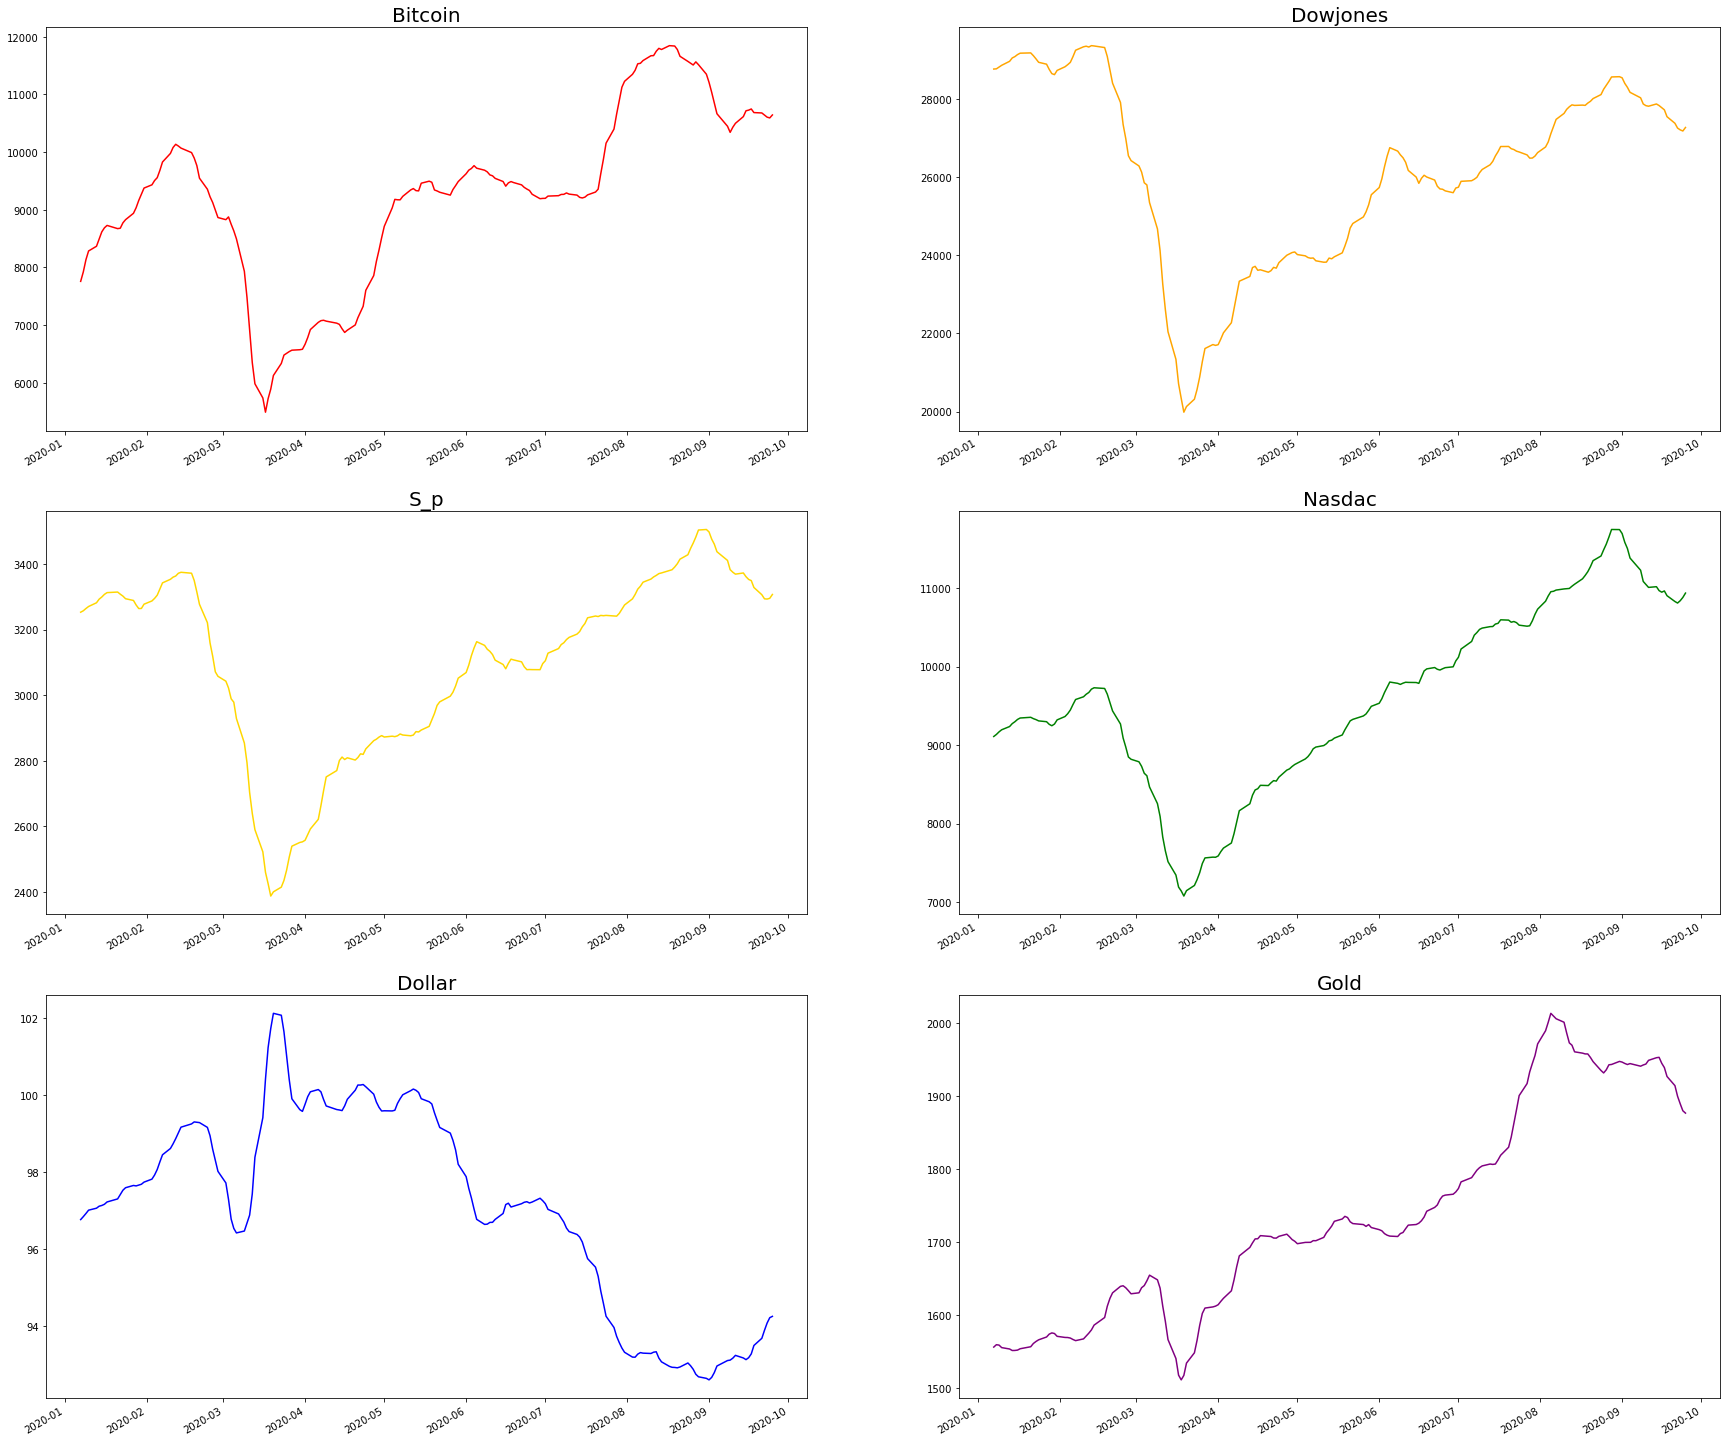

In [293]:

f,ax=plt.subplots(3,2,figsize=(30,28))
Bitcoin_trend.trend.plot(color='Red',ax=ax[0,0])
ax[0,0].set_xlabel('')
ax[0,0].set_title('Bitcoin',size=20)
ax[0,1].set_title('Dowjones',size=20)
ax[1,0].set_title('S_p',size=20)
ax[1,1].set_title('Nasdac',size=20)
ax[2,0].set_title('Dollar',size=20)
ax[2,1].set_title('Gold',size=20)
Dowjones_trend.trend.plot(color='Orange',ax=ax[0,1])
ax[0,1].set_title('Dowjones',size=20)
ax[0,1].set_xlabel('')
S_p_trend.trend.plot(color='Gold',ax=ax[1,0])
ax[1,0].set_xlabel('')
Nasdac.trend.plot(color='Green',ax=ax[1,1])
ax[1,1].set_xlabel('')
Dollar.trend.plot(color='Blue',ax=ax[2,0])
ax[2,0].set_xlabel('')
Gold.trend.plot(color='Purple',ax=ax[2,1])
ax[2,1].set_xlabel('')
plt.plot()

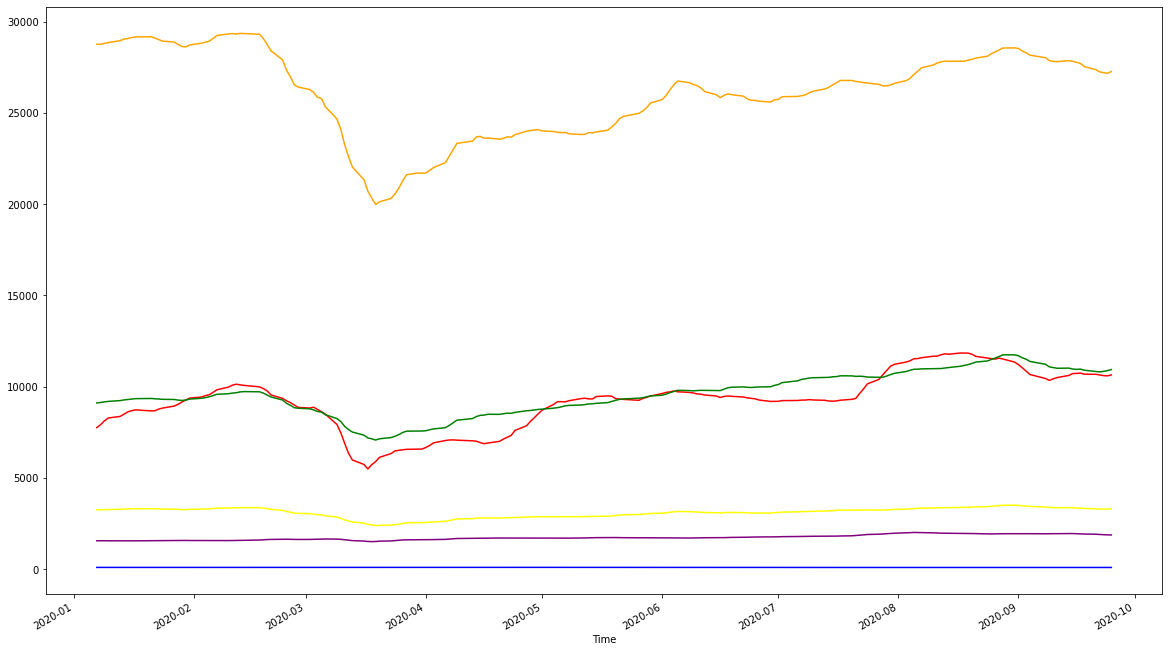

In [285]:
plt.figure(figsize=(20,12))
Bitcoin_trend.trend.plot(color='Red')
Dowjones_trend.trend.plot(color='Orange')
S_p_trend.trend.plot(color='Yellow')
Nasdac.trend.plot(color='Green')
Dollar.trend.plot(color='Blue')
Gold.trend.plot(color='Purple')

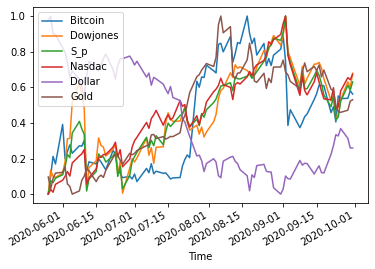

In [250]:
All_minmax.plot()

# MSE , MAE 구하는 함수

In [41]:
def MSE(prediction,test_y):
    prediction=prediction.reshape(16,)
    prediction=np.array(prediction)
    real=np.array(test_y)
    minus=prediction-real
    result=sum(minus*minus)/len(prediction)
    return result

In [42]:
def MAE(prediction,test_y):
    prediction=prediction.reshape(16,)
    prediction=np.array(prediction)
    real=np.array(test_y)
    minus=prediction-real
    result=sum(abs(minus))/len(prediction)
    return result

## 모델 구조

In [181]:
model=models.Sequential()
model.add(layers.LSTM(30,return_sequences=True,input_shape=(10,2)))
model.add(layers.LSTM(40,return_sequences=False))
model.add(layers.Dense(1,activation='linear'))
model.compile(loss='mse',optimizer='adam')

# 학습위한 전처리

## 10일 shifting , input shape 맞추기

In [172]:
def preprocessing_mult(time,column):
    b_s=All.iloc[:,[0,column]]
    for i in range(1,time+1,1):
        b_s['bitcoin'+str(i)]=All['Bitcoin'].shift(i)
    for i in range(1,time+1,1):
        b_s['S_p'+str(i)]=All['S_p'].shift(i)
    z=[]
    for g in range(len(b_s[time:])):
        xc=b_s[time:].iloc[:,2:].iloc[g].values.reshape(2,time).T
        z.append(xc)
    z=np.array(z)
    label=b_s[time:]
    return z , label,b_s
z,label,b_s=preprocessing_mult(10,10)

<ipython-input-172-de09d246ff3f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_s['bitcoin'+str(i)]=All['Bitcoin'].shift(i)


In [140]:
z.shape

(179, 10, 2)

## train , test 스플릿

In [173]:
x_train=z[0:163]
y_train=label['Bitcoin'][0:163]
x_test=z[163:]
y_test=label['Bitcoin'][163:]

## min max scale 원래 값으로 돌리는 함수

In [255]:
All.loc[All['Bitcoin']==1] # 12282.6

,Bitcoin,Bitcoin_sv,Bitcoin_cash,Xrp,Ethereum,Litecoin,Dowjones,S_p,Nasdac,Dollar,Gold
Time,,,,,,,,,,,
2020-08-17,1.0,0.397527,0.493251,0.896212,0.875794,0.703215,0.844289,0.851984,0.82164,0.062402,0.840951


In [261]:
All.loc[All['Bitcoin']==0] # 4826

,Bitcoin,Bitcoin_sv,Bitcoin_cash,Xrp,Ethereum,Litecoin,Dowjones,S_p,Nasdac,Dollar,Gold
Time,,,,,,,,,,,
2020-03-12,0.0,0.028126,0.0,0.0,0.0,0.0,0.23803,0.181058,0.065655,0.46479,0.162591


In [265]:
def restore(x):
    result= x*(12282.6-4826)+4826
    return result

# 금

Epoch 1/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0042
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0050
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0044
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0044
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0042
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 10/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 11/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 12/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 13/100
17/17 [=================

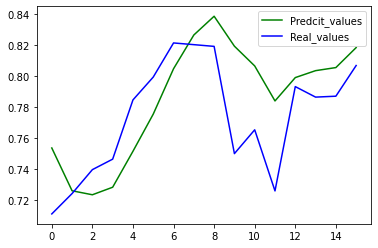

In [178]:
model.fit(x_train,y_train,epochs=100,batch_size=10)
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

Epoch 1/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0019
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 9/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 10/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 11/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 12/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 13/100
17/17 [=================

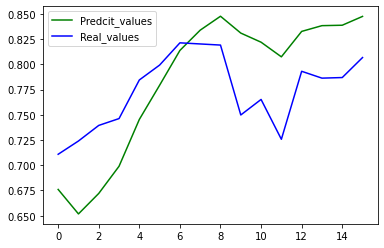

In [167]:
model.fit(x_train,y_train,epochs=100,batch_size=10)
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

Epoch 1/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0030
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 8/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 9/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 10/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 11/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 12/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0032
Epoch 13/100
17/17 [=================

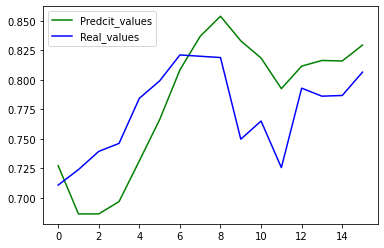

In [165]:
model.fit(x_train,y_train,epochs=100,batch_size=10)
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

In [272]:
restore(0.78)-restore(0.72)

447.39600000000064

Epoch 1/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0051
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 10/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 11/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 12/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 13/100
17/17 [=================

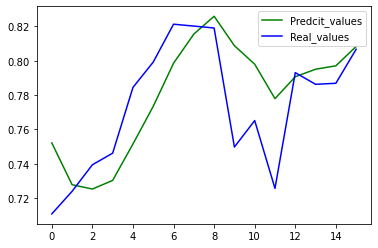

In [163]:
model.fit(x_train,y_train,epochs=100,batch_size=10)
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

Epoch 1/100
17/17 [==============================] - 0s 6ms/step - loss: 0.1373
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0285
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0157
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0144
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0135
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0126
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0114
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0108
Epoch 9/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0089
Epoch 10/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0093
Epoch 11/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0094
Epoch 12/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0086
Epoch 13/100
17/17 [=================

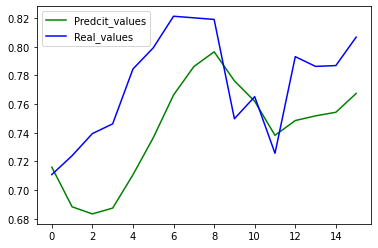

In [162]:
model.fit(x_train,y_train,epochs=100,batch_size=10)
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

Epoch 1/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0047
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0049
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0041
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 8/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0037
Epoch 9/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 10/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 11/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0043
Epoch 12/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0037
Epoch 13/100
17/17 [=================

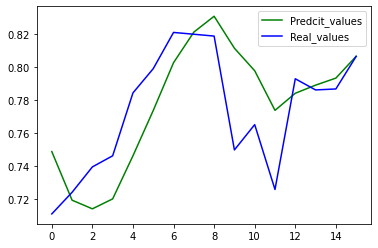

In [106]:
model.fit(x_train,y_train,epochs=100,batch_size=10)
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

Epoch 1/100
17/17 [==============================] - 0s 6ms/step - loss: 0.1907
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0231
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0148
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0129
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0117
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0107
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0099
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0101
Epoch 9/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0095
Epoch 10/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0093
Epoch 11/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0094
Epoch 12/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0094
Epoch 13/100
17/17 [=================

0.0014864955611243412 0.0294732454196676


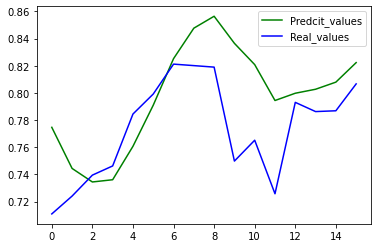

In [105]:
model.fit(x_train,y_train,epochs=100,batch_size=10)
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

In [99]:
model.fit(x_train,y_train,epochs=100,batch_size=10)

Epoch 1/100
17/17 [==============================] - 0s 5ms/step - loss: 0.1227
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0200
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0165
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0141
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0122
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0125
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0113
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0096
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0091
Epoch 10/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0093
Epoch 11/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0087
Epoch 12/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0086
Epoch 13/100
17/17 [=================

0.0007330504839809182 0.02115314736951525


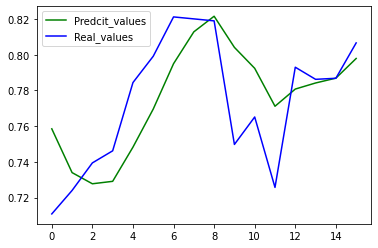

In [100]:
model.fit(x_train,y_train,epochs=100,batch_size=10)
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

0.000923884316650381 0.02389824013186144


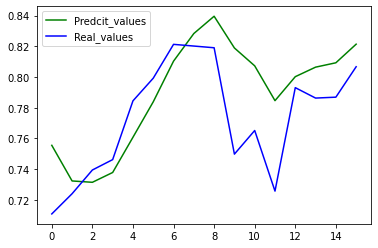

In [76]:
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

0.0031242256661320844 0.04549632886433104


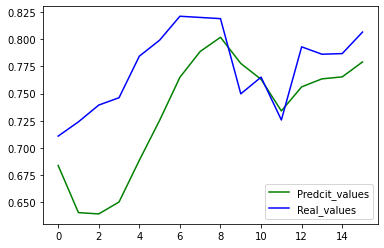

In [78]:
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

0.0012271285263710343 0.028782382267434778


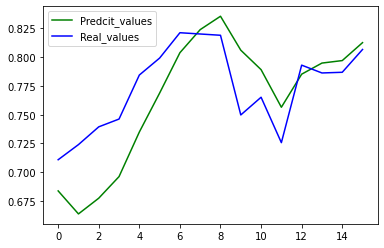

In [83]:
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

Epoch 1/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 8/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 9/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 10/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 11/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0016
Epoch 12/100
17/17 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 13/100
17/17 [=================

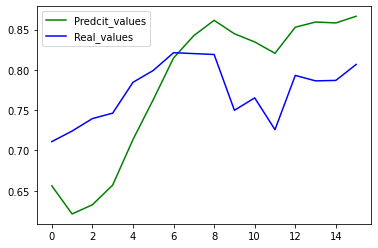

In [169]:
model.fit(x_train,y_train,epochs=100,batch_size=10)
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

# S&P

In [91]:
model=models.Sequential()
model.add(layers.LSTM(30,return_sequences=True,input_shape=(10,2)))
model.add(layers.LSTM(40,return_sequences=False))
model.add(layers.Dense(1,activation='linear'))
model.compile(loss='mse',optimizer='adam')

In [92]:
model.fit(x_train,y_train,epochs=100,batch_size=10)

Epoch 1/100
17/17 [==============================] - 0s 5ms/step - loss: 0.1157
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0256
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0146
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0128
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0120
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0108
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0098
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0098
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0093
Epoch 10/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0095
Epoch 11/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0102
Epoch 12/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0091
Epoch 13/100
17/17 [=================

In [110]:
model.fit(x_train,y_train,epochs=100,batch_size=10)

Epoch 1/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0042
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0035
Epoch 7/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 8/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0034
Epoch 9/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0041
Epoch 10/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 11/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0040
Epoch 12/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0054
Epoch 13/100
17/17 [=================

Epoch 1/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 10/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 11/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 12/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 13/100
17/17 [=================

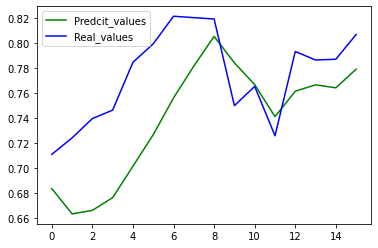

In [112]:
model.fit(x_train,y_train,epochs=100,batch_size=10)
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

Epoch 1/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0030
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 9/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 10/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 11/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 12/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 13/100
17/17 [=================

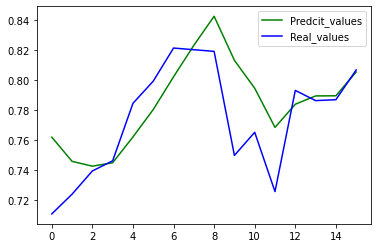

In [113]:
model.fit(x_train,y_train,epochs=100,batch_size=10)
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

Epoch 1/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0042
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0029
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 10/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 11/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0030
Epoch 12/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0030
Epoch 13/100
17/17 [=================

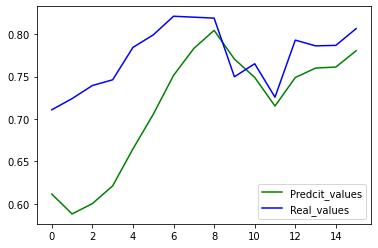

In [114]:
model.fit(x_train,y_train,epochs=100,batch_size=10)
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

0.003997780668440986 0.05642660072368251


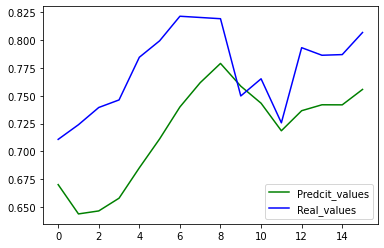

In [111]:
model.fit(x_train,y_train,epochs=100,batch_size=10)
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

0.0008092135296457736 0.021550522255231033


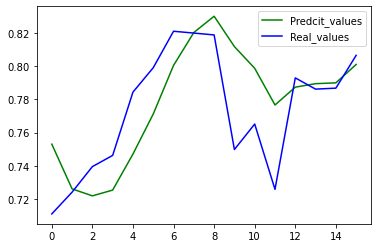

In [93]:
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

0.001054527681965318 0.0291853299689135


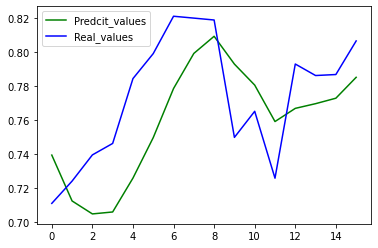

In [90]:
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

# Dowjones

Epoch 1/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 10/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 11/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 12/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 13/100
17/17 [=================

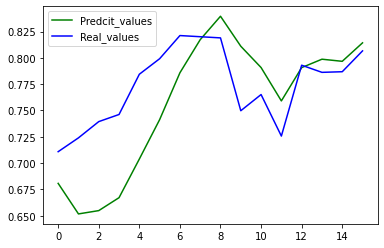

In [119]:
model.fit(x_train,y_train,epochs=100,batch_size=10)
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

Epoch 1/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 10/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 11/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 12/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 13/100
17/17 [=================

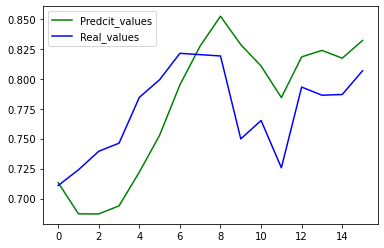

In [120]:
model.fit(x_train,y_train,epochs=100,batch_size=10)
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

Epoch 1/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 10/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0015
Epoch 11/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 12/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 13/100
17/17 [=================

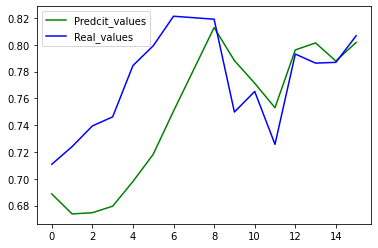

In [121]:
model.fit(x_train,y_train,epochs=100,batch_size=10)
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

Epoch 1/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 9/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 10/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 11/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 12/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 13/100
17/17 [=================

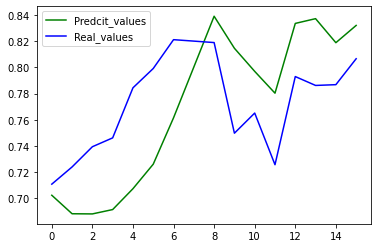

In [122]:
model.fit(x_train,y_train,epochs=100,batch_size=10)
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

Epoch 1/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0011
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 10/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 11/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 12/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 13/100
17/17 [=================

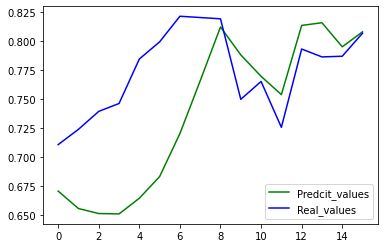

In [123]:
model.fit(x_train,y_train,epochs=100,batch_size=10)
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

# nasdac

In [270]:
restore(0.74)-restore(0.72)

149.1319999999996

Epoch 1/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0766
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0148
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0097
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0091
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0094
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0101
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0088
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0100
Epoch 9/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0091
Epoch 10/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0084
Epoch 11/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0079
Epoch 12/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0079
Epoch 13/100
17/17 [=================

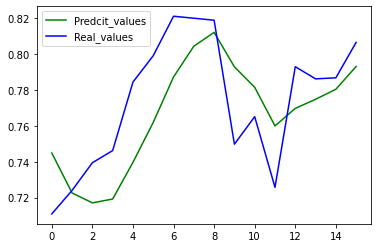

In [133]:
model.fit(x_train,y_train,epochs=100,batch_size=10)
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

Epoch 1/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0034
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0042
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0050
Epoch 6/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0047
Epoch 7/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 8/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0039
Epoch 9/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0035
Epoch 10/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0038
Epoch 11/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0046
Epoch 12/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0045
Epoch 13/100
17/17 [=================

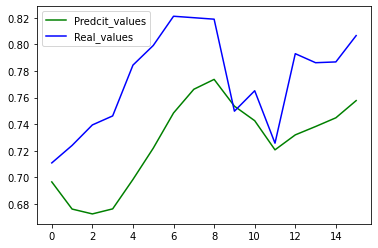

In [134]:
model.fit(x_train,y_train,epochs=100,batch_size=10)
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

Epoch 1/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0029
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0029
Epoch 3/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 4/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0026
Epoch 6/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 8/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0029
Epoch 9/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 10/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0039
Epoch 11/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0040
Epoch 12/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0047
Epoch 13/100
17/17 [=================

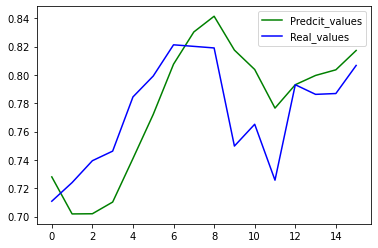

In [136]:
model.fit(x_train,y_train,epochs=100,batch_size=10)
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

Epoch 1/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0034
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 6/100
17/17 [==============================] - 0s 8ms/step - loss: 0.0031
Epoch 7/100
17/17 [==============================] - ETA: 0s - loss: 0.002 - 0s 8ms/step - loss: 0.0034
Epoch 8/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0032
Epoch 9/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 10/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 11/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 12/100
17/17 [==============================] - 0s 11ms/step - loss: 0.0029
Epoch 13/100

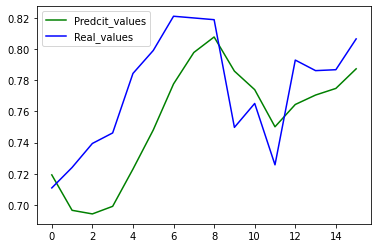

In [135]:
model.fit(x_train,y_train,epochs=100,batch_size=10)
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

Epoch 1/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0032
Epoch 6/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 7/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0026
Epoch 8/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0027
Epoch 9/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0026
Epoch 10/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0025
Epoch 11/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 12/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0029
Epoch 13/100
17/17 [=================

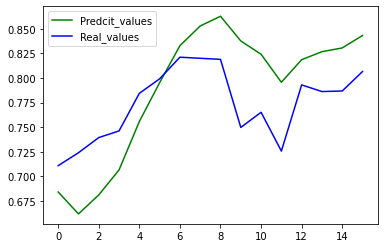

In [137]:
model.fit(x_train,y_train,epochs=100,batch_size=10)
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

# dollar

In [171]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 10, 30)            3960      
_________________________________________________________________
lstm_23 (LSTM)               (None, 40)                11360     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 41        
Total params: 15,361
Trainable params: 15,361
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0026
Epoch 4/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0024
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0024
Epoch 6/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 7/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 8/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0024
Epoch 9/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 10/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 11/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 12/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 13/100
17/17 [=================

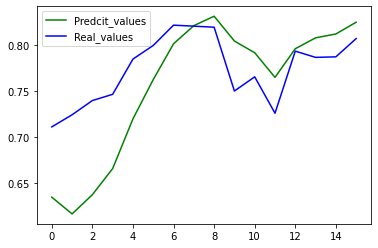

In [143]:
model.fit(x_train,y_train,epochs=100,batch_size=10)
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

Epoch 1/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0029
Epoch 2/100
17/17 [==============================] - 0s 7ms/step - loss: 0.0026
Epoch 3/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0023
Epoch 4/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0024
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0026
Epoch 6/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0023
Epoch 7/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0023
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 9/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 10/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 11/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 12/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 13/100
17/17 [=================

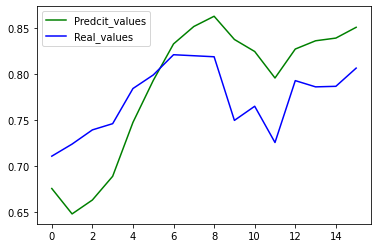

In [144]:
model.fit(x_train,y_train,epochs=100,batch_size=10)
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

Epoch 1/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0023
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 9/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 10/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0022
Epoch 11/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 12/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0022
Epoch 13/100
17/17 [=================

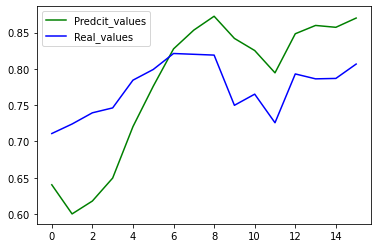

In [145]:
model.fit(x_train,y_train,epochs=100,batch_size=10)
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

Epoch 1/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0019
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 8/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0015
Epoch 9/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0015
Epoch 10/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 11/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0014
Epoch 12/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 13/100
17/17 [=================

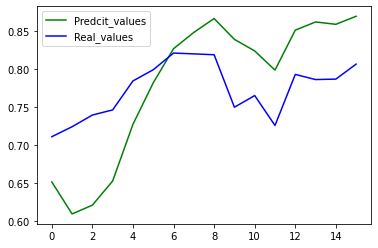

In [149]:
model.fit(x_train,y_train,epochs=100,batch_size=10)
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))

Epoch 1/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 3/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 4/100
17/17 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 8/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 9/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 10/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 11/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 12/100
17/17 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 13/100
17/17 [=================

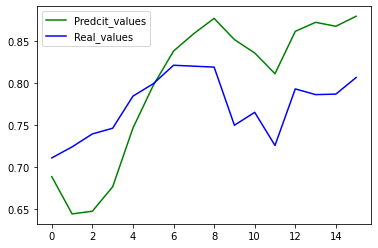

In [150]:
model.fit(x_train,y_train,epochs=100,batch_size=10)
prediction=model.predict(x_test)
prediction.reshape(16,)
plt.plot(prediction,color='Green')
plt.plot(test_y,Color="Blue")
plt.legend(labels=('Predcit_values','Real_values'))
print(MSE(prediction,test_y) , MAE(prediction,test_y))